# **1. Data Cleaning**

## **1.1. Dependencies**

In [1]:
%pip install missingno
%pip install seaborn
%pip install nbformat>=4.2.0

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
zsh:1: 4.2.0 not found
Note: you may need to restart the kernel to use updated packages.


## **1.2. Links to Datasets Used**

**Forbes Billionaires Evolution:** *https://www.kaggle.com/datasets/guillemservera/forbes-billionaires-1997-2023?select=all_billionaires_1997_2023.csv* <br/>
**Genders:** *https://archive.ics.uci.edu/dataset/591/gender+by+name*<br/>
**Capitals:** *https://www.kaggle.com/datasets/sirishasingla1906/countries-of-the-world?resource=download*

## **1.3. Imports**

In [2]:
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import re

### **1.3.1. For Google Colab** 

In [ ]:
from google.colab import drive

drive.mount('/content/drive')
drive_path = "drive/MyDrive/data_science"

df = pd.read_csv("{path}/billionaires.csv".format(path=drive_path))
genders = pd.read_csv('{path}/genders.csv'.format(path=drive_path))
capitals = pd.read_csv('{path}/countries.csv'.format(path=drive_path))

### **1.3.2. For Local Development**

In [6]:
df = pd.read_csv("./billionaires.csv")
genders = pd.read_csv('./genders.csv')
capitals = pd.read_csv('./countries.csv')

## **1.4. Loading Billionaries' Dataset**

In [7]:

print("data frame shape: ", df.shape)
df.head(10)

data frame shape:  (31732, 19)


,year,month,rank,net_worth,last_name,first_name,full_name,birth_date,age,gender,country_of_citizenship,country_of_residence,city_of_residence,business_category,business_industries,organization_name,position_in_organization,self_made,wealth_status
0,1997,7,NaN,2.0 B,Sophonpanich,Chatri,Chatri Sophonpanich & family,1934-02-28,73.0,Male,Thailand,Thailand,Bangkok,Finance and Investments,['Finance and Investments'],NaN,NaN,False,NaN
1,1997,7,NaN,1.8 B,Adulyadej,King Bhumibol,King Bhumibol Adulyadej,1927-12-05,69.0,Male,Thailand,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
2,1998,7,NaN,3.3 B,Safra,Edmond,Edmond Safra,1932-08-06,65.0,Male,Lebanon,Lebanon,NaN,NaN,NaN,NaN,NaN,True,NaN
3,1999,7,NaN,1.0 B,Hinduja,"Srichand, Gopichand,",Srichand & Gopichand Hinduja,1935-11-28,NaN,NaN,India,United Kingdom,London,NaN,NaN,NaN,NaN,False,NaN
4,1999,7,NaN,7.1 B,Schwarz,Dieter,Dieter Schwarz,1939-09-24,59.0,Male,Germany,Germany,Neckarsulm,Fashion & Retail,['Fashion & Retail'],NaN,NaN,True,NaN
5,1999,7,NaN,1.3 B,Ardila Lulle,Carlos,Carlos Ardila Lülle,1930-06-04,68.0,Male,Colombia,Colombia,Bogota,Food and Beverage,['Food and Beverage'],NaN,NaN,True,NaN
6,1999,7,NaN,2.9 B,Ebner,Martin,Martin Ebner,1945-08-01,53.0,Male,Switzerland,Switzerland,Wilen,Finance and Investments,['Finance and Investments'],NaN,NaN,False,NaN
7,1999,7,NaN,1.0 B,Cutrale,Jose,Jose Luis Cutrale,1946-09-17,NaN,Male,Brazil,Brazil,Sao Paulo,Food and Beverage,['Food and Beverage'],NaN,NaN,True,NaN
8,1999,7,NaN,1.1 B,Lee,Peter,Lee family,NaN,71.0,Male,Hong Kong,Hong Kong,Hong Kong,NaN,NaN,NaN,NaN,False,NaN
9,1999,7,NaN,1.8 B,Kampf,Serge,Serge Kampf,1934-01-01,65.0,Male,France,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN


## **1.5. Visualizing nulls**

============== Features Data Types ============== 
 year                          int64
month                         int64
rank                        float64
net_worth                    object
last_name                    object
first_name                   object
full_name                    object
birth_date                   object
age                         float64
gender                       object
country_of_citizenship       object
country_of_residence         object
city_of_residence            object
business_category            object
business_industries          object
organization_name            object
position_in_organization     object
self_made                    object
wealth_status                object
dtype: object
============== Null Values Counts ============== 
 year                            0
month                           0
rank                           18
net_worth                       0
last_name                    3689
first_name                   

<Axes: >

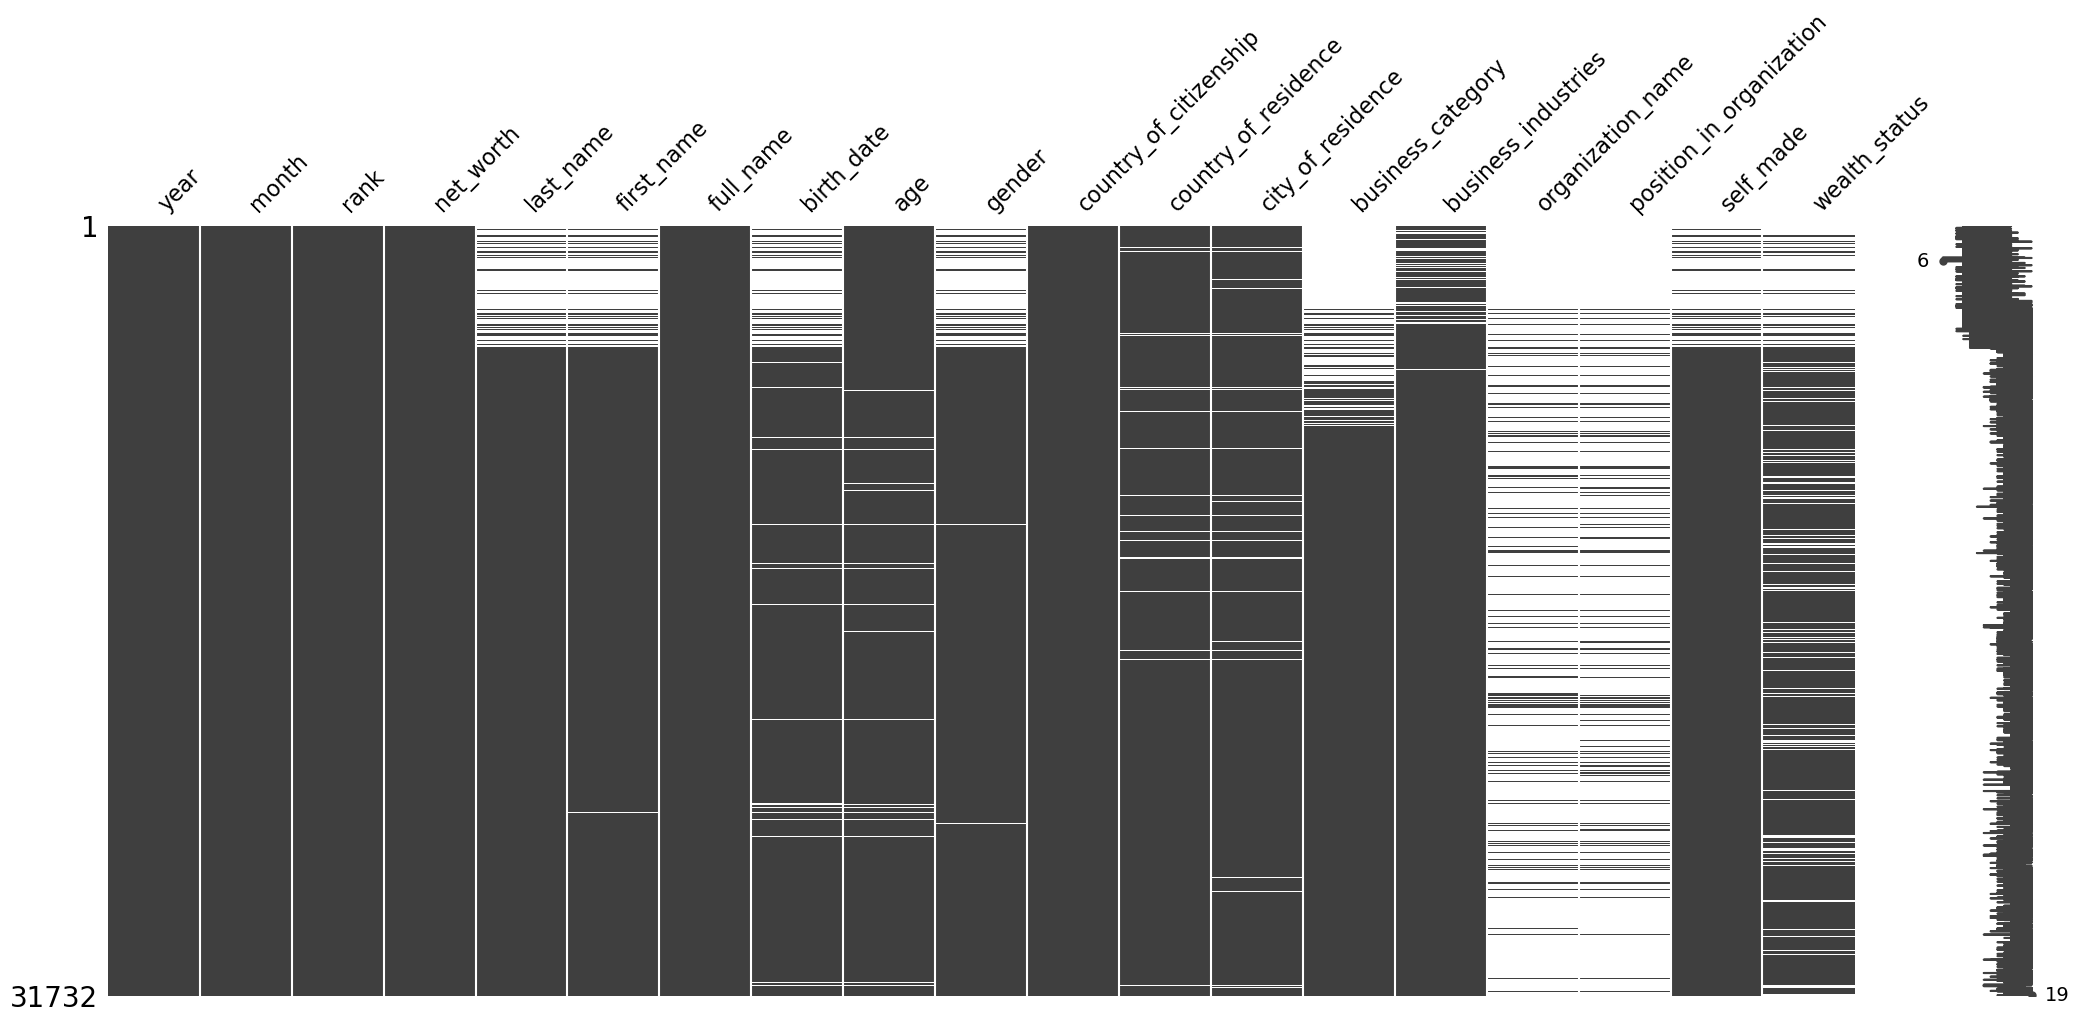

In [8]:
print("============== Features Data Types ============== \n", df.dtypes)
print("============== Null Values Counts ============== \n", df.isnull().sum())
msno.matrix(df)

## **1.6. Cleaning Features**


### **1.6.1. Filling empty first_name and last_name**

In [9]:
first_name_list = list(df.first_name.isnull().index)
last_name_list = list(df.last_name.isnull().index)

# filling the first name
df.loc[first_name_list, 'first_name'] = (df.loc[first_name_list, 'full_name']
                                        .str
                                        .split()
                                        .apply(lambda x: x[0]))

# filling the second name
df.loc[last_name_list, 'last_name'] = (df.loc[last_name_list, 'full_name']
                                        .str
                                        .split()
                                        .apply(lambda x: x[-1]))

### **1.6.2. Cleaning net_worth from prefixes and casting it to float**

In [10]:
if df['net_worth'].dtype != 'float64':
  df['net_worth'] = df['net_worth'].str.replace('B', "").astype(float)

### **1.6.3. Deducing age and birth_year from birth_date**


In [11]:
# df['birth_date'] = pd.to_datetime(df['birth_date'])
# df['birth_year'] = df['birth_date'].dt.year.astype('Int64')

# age_list = list(df.age.isna())
# birth_year_list = list(df.birth_year.isna())
# birth_date_list = list(df.birth_date.isna())

# # fill empty birth years
# df.loc[birth_year_list, 'birth_year'] = df.loc[birth_year_list, 'year'] - df.loc[birth_year_list, 'age']

# # fill empty ages
# df.loc[age_list, 'age'] = df.loc[age_list, 'year'] - df.loc[age_list, 'birth_year']




df['birth_date'] = pd.to_datetime(df['birth_date'], errors='coerce')
df['birth_year'] = df['birth_date'].dt.year.astype('Int64')

df['both_missing'] = (df['age'].isna() & df['birth_date'].isna())

# Fill missing birth_year with year - age
missing_year = ~df['both_missing'] & df['birth_year'].isna() & ~df['age'].isna()
df.loc[missing_year, 'birth_year'] = df.loc[missing_year, 'year'] - df.loc[missing_year, 'age']

# Fill missing age with year - birth_year
missing_age = ~df['both_missing'] & df['age'].isna() & ~df['birth_year'].isna()
df.loc[missing_age, 'age'] = df.loc[missing_age, 'year'] - df.loc[missing_age, 'birth_year']

# Fill missing birth_date with first day of the year
missing_birthdate = ~df['both_missing'] & df['birth_date'].isna() & ~df['birth_year'].isna()
df.loc[missing_birthdate, 'birth_date'] = pd.to_datetime(df.loc[missing_birthdate, 'birth_year'].astype(str) + '-01-01')

df.drop('both_missing', axis=1, inplace=True)

In [ ]:
# # fill empty birth_date
# birth_year_null = df['birth_year'].isna()
# birth_date_null = df['birth_date'].isna()
# filtered_df = birth_date_null & ~birth_year_null

# rand_days = np.random.randint(1, 29, sum(filtered_df)) # is not a default dd/mm better?

# df.loc[filtered_df, 'birth_date'] = (pd.to_datetime(
#                                       df.loc[filtered_df, 'birth_year'].astype(str) +
#                                       '-' +
#                                       df.loc[filtered_df, 'month'].astype(str) +
#                                       '-' +
#                                       rand_days.astype(str)))

### **1.6.4. Deduce gender from first_name**


In [12]:

name_gender_map = dict(zip(genders['Name'], genders['Gender'].map({'M': 'Male', 'F': 'Female'})))
df.loc[df['gender'].isnull(), 'gender'] = df.loc[df['gender'].isnull(), 'first_name'].map(name_gender_map)

df["gender"].isnull().sum()

479

### **1.6.5. Filling country_of_residency**


In [13]:
residency_list = list(df.country_of_residence.isnull())
df.loc[residency_list, 'country_of_residence'] = df.loc[residency_list, 'country_of_citizenship']

citizenship_list= list(df.country_of_citizenship .isnull())
df.loc[citizenship_list,'country_of_citizenship'] = df.loc[citizenship_list,'country_of_residence']

### **1.6.6. Dropping unncessary features**


In [14]:
for feature in ['position_in_organization', 'organization_name', 'business_category']:
    if feature in df:
        del df[feature]

### **1.6.7. Deducing self_made feature from year's self_made mean**

In [15]:
avg_self_made = df.groupby('year')['self_made'].mean()
self_made_list = list(df.self_made.isnull())
df.loc[self_made_list, 'self_made'] = (df.loc[self_made_list, 'year']
                                         .apply(lambda year: round(avg_self_made[year]) == 1))

###  **1.6.8. Filling empty wealth_status values** (TBD)

In [16]:
# Determine it from previous year
status_list = list(df.wealth_status.isnull())
df.loc[status_list, 'wealth_status'] = "Remained Even"

### **1.6.9. Filling empty city_of_residence values**

In [17]:
def getCapital(name):
    records = capitals[capitals['Countries'] == name]
    if len(records) == 0:
        return np.nan
    else:
        record = records.iloc[0]
        return record['Capital']

empty_valuses = df['city_of_residence'].isnull()
df.loc[empty_valuses, 'city_of_residence'] = df.loc[empty_valuses, 'country_of_citizenship'].apply(lambda x: getCapital(x))

### **1.6.10. Dropping remaining nulls**

In [18]:
df= df.dropna()

### **1.6.11. Clean business_industries feature**

In [20]:
def clean_industry(x: str):
    x = re.sub(r'[\[\]\'\']', '', x)
    x = re.sub(r'\s+and\s+', ' & ', x)
    x = re.sub(r'\s+&#38;\s+', ' & ', x)

    return x.strip()

df.loc[:, 'business_industries'] = df['business_industries'].apply(clean_industry)
df.loc[df['business_industries'].str.lower().isin(['healthcare', 'health care']), 'business_industries'] = "Healthcare"

# **2. Visualizations**

## **2.1. Internal Questions**

### **2.1.1. Average age across industries with respect to citizinship and gender**
Q: How does the average age at which Billionaires achieve their status differ across industries, countries of origin, and gender over the years of study?

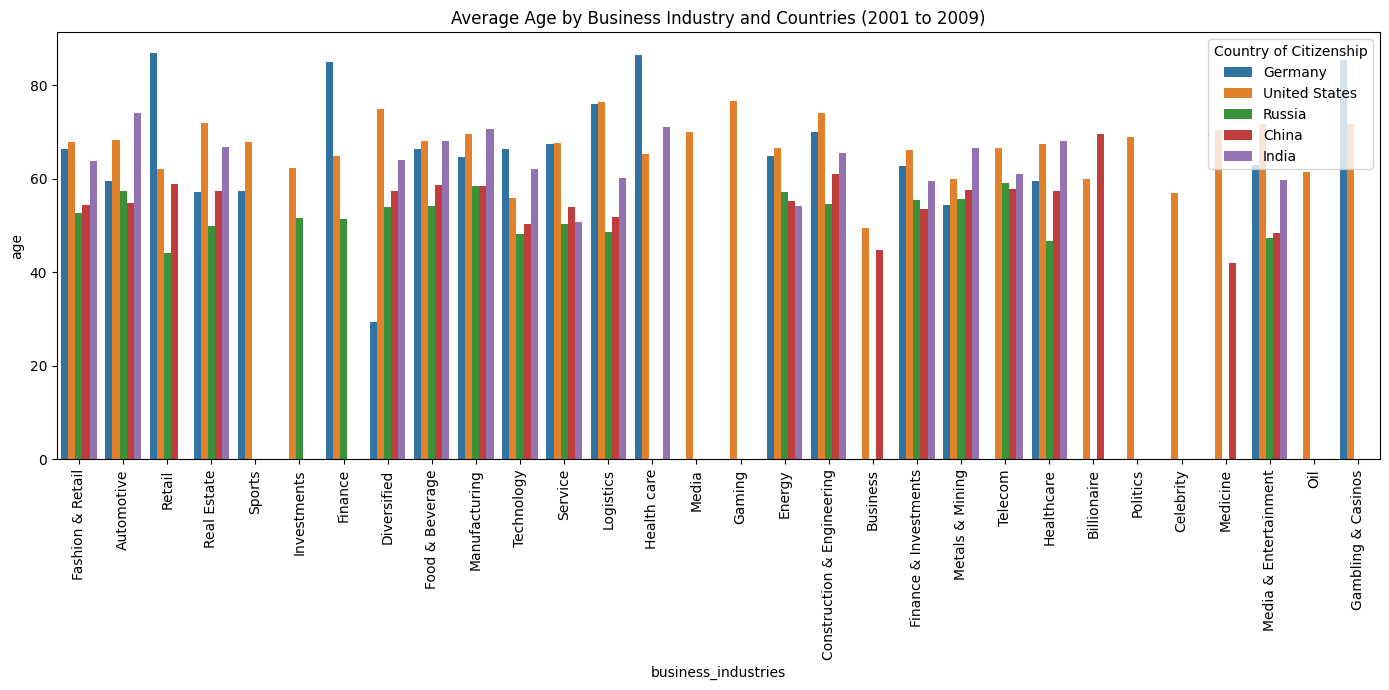

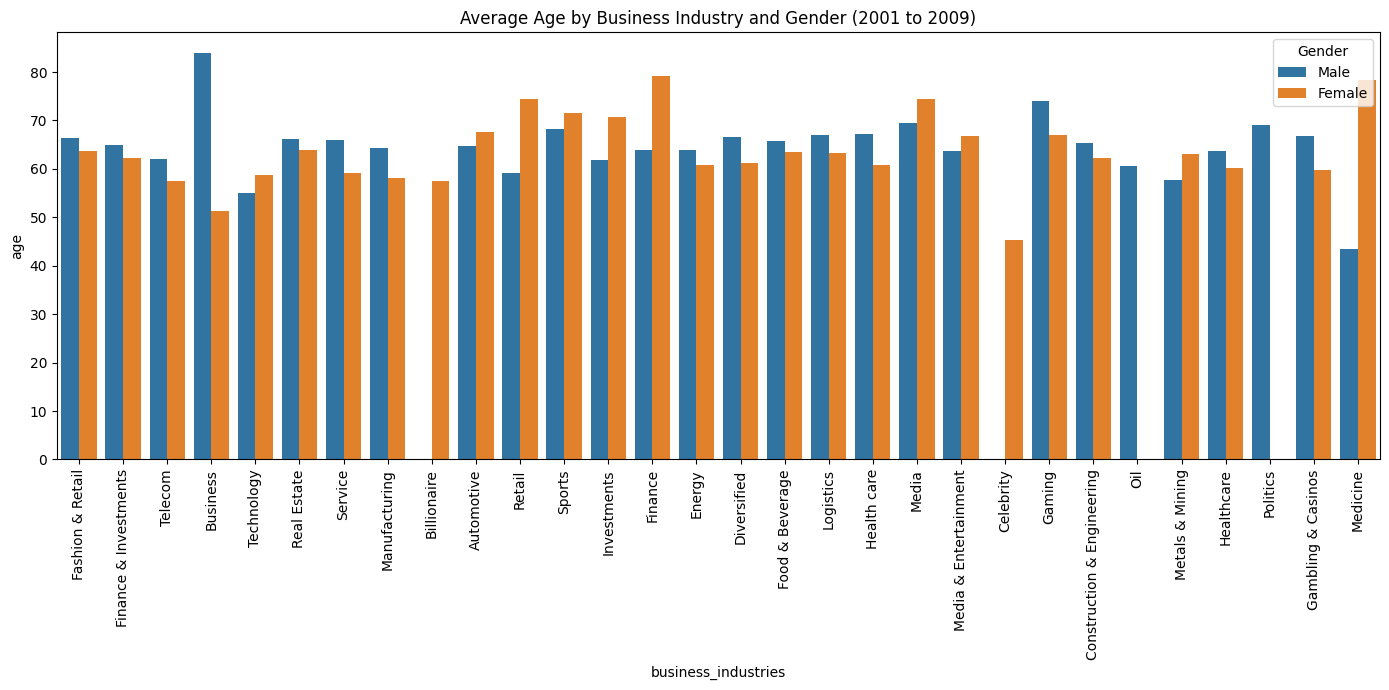

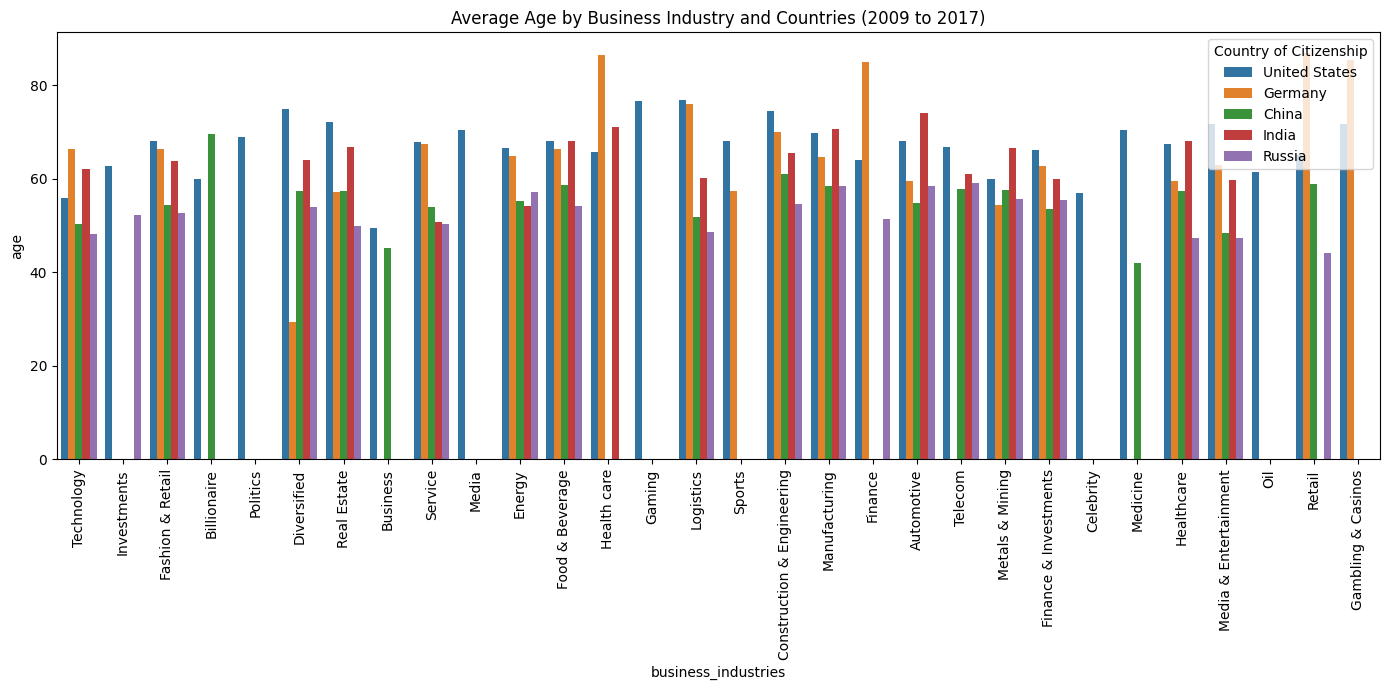

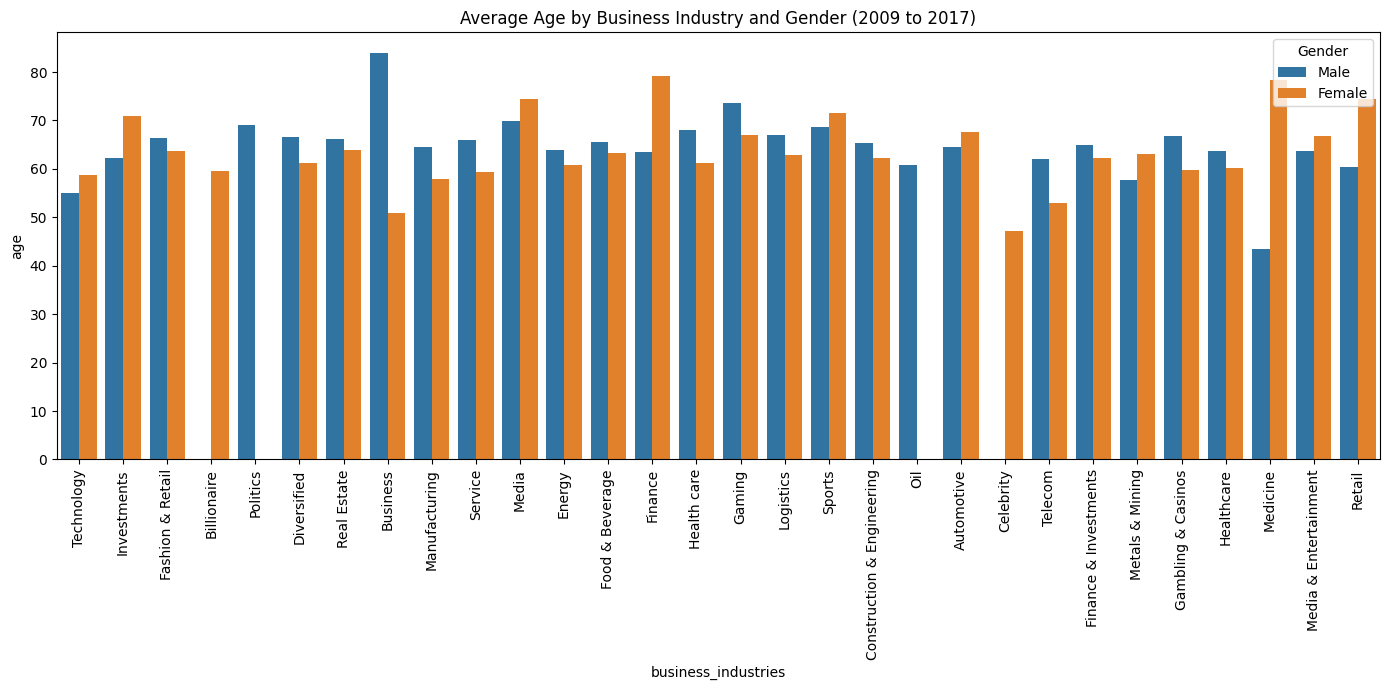

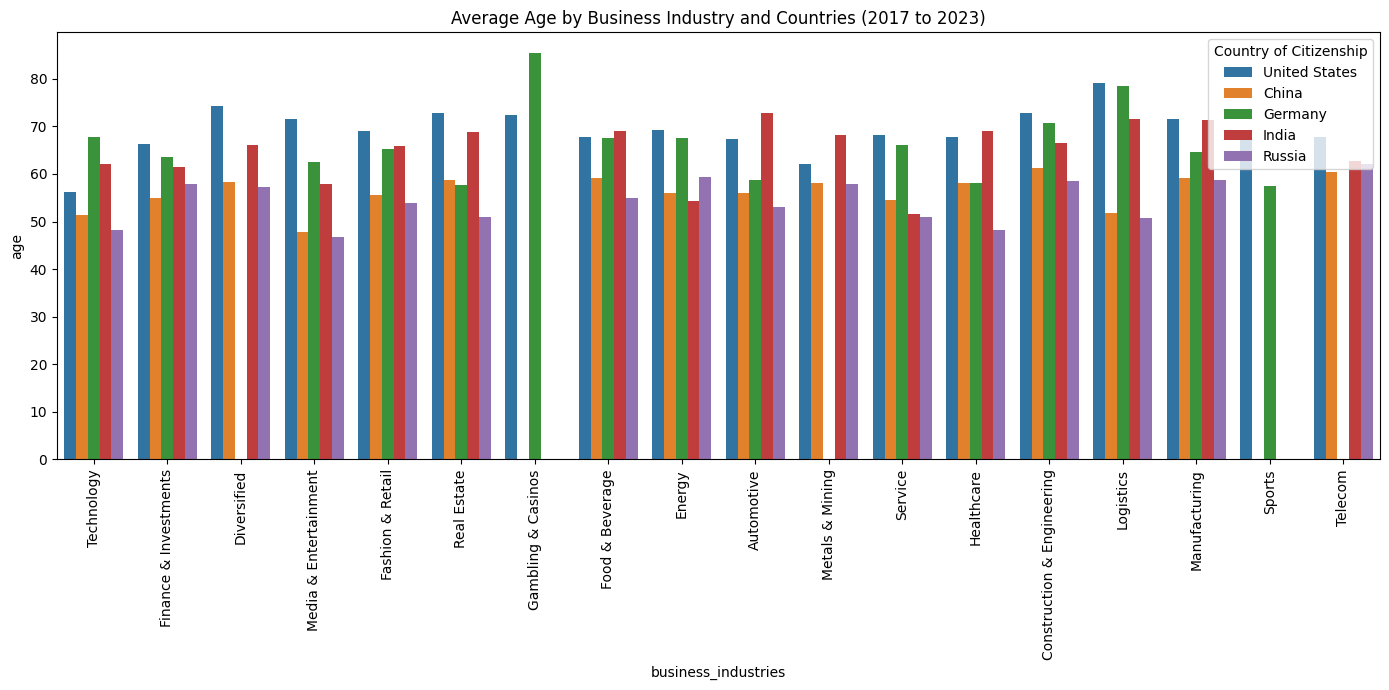

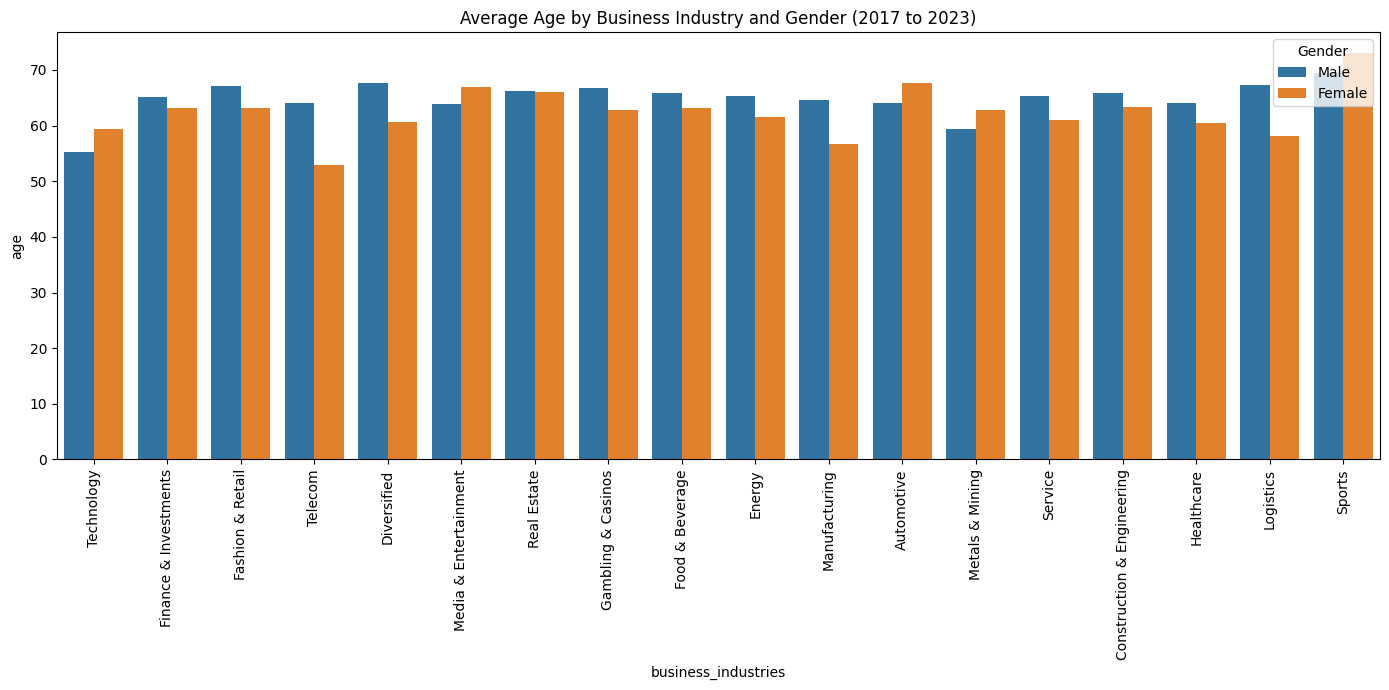

In [ ]:
def barplot(x, y, hue, title, legend_title, data=df):
    plt.figure(figsize=(14, 7))
    ax = sns.barplot(x=x, y=y, data=data, hue=hue, errorbar=None)
    ax.legend(title=legend_title, loc="upper right", )
    plt.title(title)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


year_step = 8
start_year = df["year"].min()
last_year = df["year"].max()

for year in range(start_year, last_year + 1, year_step):
    data = df[df["year"] >= year]

    # Average age by business industry and top n countries
    n = 5
    top_countries = data['country_of_citizenship'].value_counts().nlargest(n).index.tolist()
    filtered_data = data[data['country_of_citizenship'].isin(top_countries)]

    barplot(x="business_industries",
            y="age",
            hue="country_of_citizenship",
            title="Average Age by Business Industry and Countries ({} to {})".format(year, min(year + year_step, last_year)),
            legend_title="Country of Citizenship",
            data=filtered_data)

    # Average age by business industry and gender
    barplot(x="business_industries",
            y="age",
            hue="gender",
            title="Average Age by Business Industry and Gender ({} to {})".format(year, min(year + year_step, last_year)),
            legend_title="Gender",
            data=data)

### **2.1.3 Industries effect on the distribution of billionaires**
Q: How have different industries affected the distribution of billionaires across countries and regions over the years?

In [ ]:
filtered_data = df[['country_of_residence']]
billionaire_counts = filtered_data['country_of_residence'].value_counts().reset_index()
billionaire_counts.columns = ['country', 'count']

fig = px.scatter_geo(billionaire_counts,
                     locations="country",
                     locationmode='country names',
                     color="count",
                     hover_name="country",
                     size="count",
                     projection="natural earth")

fig.update_layout(
    title='Distribution of Billionaires by Country of Residence',
    coloraxis_colorbar=dict(title='Billionaires Count'),
    geo=dict(showcountries=True, countrycolor='rgb(230, 230, 230)'),
    width=1000,
    height=800
)

fig.show()

### **2.1.4. Concentration of industries across countries**
Q: Do specific countries or regions have a higher concentration of billionaires who specialize in particular business categories?

In [ ]:
filtered_data = df[['country_of_citizenship',
                    'country_of_residence',
                    'business_category',
                    'business_industries']]

grouped_data = (filtered_data.groupby(['country_of_citizenship',
                                      'business_category'])
                                      .size()
                                      .reset_index(name='count'))

fig = px.treemap(grouped_data,
                 path=['country_of_citizenship', 'business_category'],
                 values='count',
                 color='count',
                 color_continuous_scale='Viridis',
                 title='Concentration of Billionaires by Country and Business Category')


fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()

### **2.1.5. Average Net Worth Over Time by Self-Made Status**
Q: How does the rate of wealth growth or decline vary between self-made and non-self-made billionaires over time?

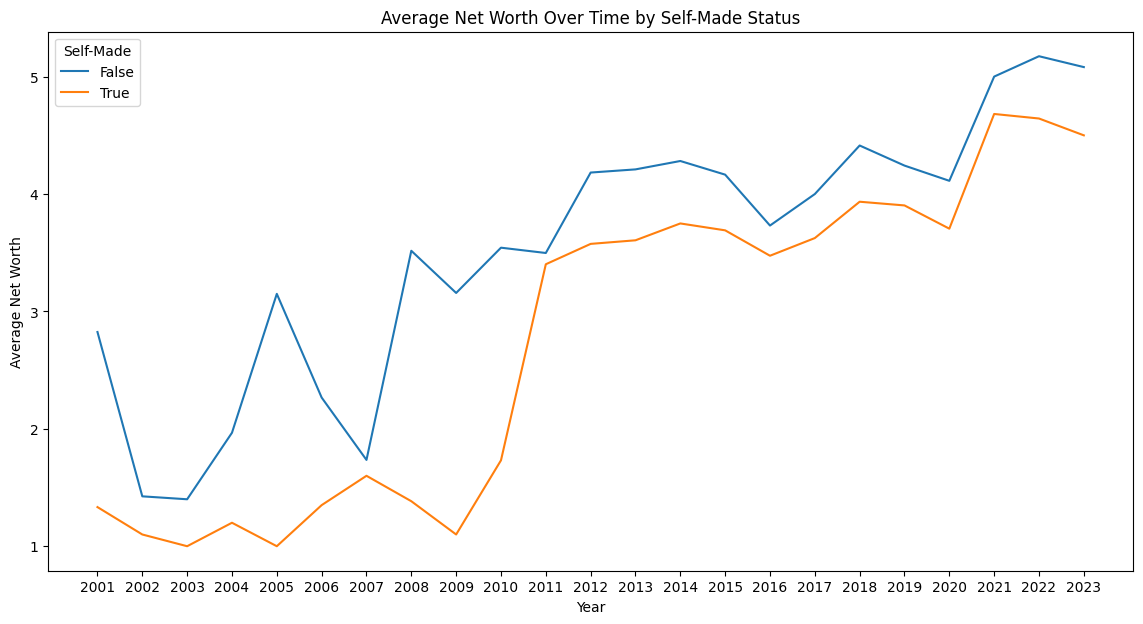

In [ ]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='year', y='net_worth', hue='self_made', errorbar=None)
plt.title('Average Net Worth Over Time by Self-Made Status')
plt.xlabel('Year')
plt.xticks(df["year"].unique())
plt.ylabel('Average Net Worth')
plt.legend(title='Self-Made')
plt.show()

### **2.1.6. Changing Status' Impact on Rank and Wealth**
Q: Has any billionaire changed their country of residence, citizenship, or industry over the years, and how has this affected their rank and net worth in list?

In [ ]:
grouped = df.groupby("full_name")


def filter_changed_records(group):
    if (len(group["country_of_citizenship"].unique()) > 1) or \
       (len(group["country_of_residence"].unique()) > 1) or \
       (len(group["business_industries"].unique()) > 1):
        return group

changed_records = pd.concat([filter_changed_records(group) for name, group in grouped])


print("Changed records:")
print(changed_records.head(20))


Changed records:
       year  month   rank  net_worth  last_name first_name   
138    2001      7  151.0        3.0  Perenchio         A.  \
465    2002      3  152.0        2.6  Perenchio         A.   
818    2003      3  162.0        2.3  Perenchio         A.   
1167   2004      3  186.0        2.7  Perenchio         A.   
1668   2005      3  258.0        2.4  Perenchio         A.   
2191   2006      3  240.0        2.9  Perenchio         A.   
2880   2007      3  287.0        3.0  Perenchio         A.   
3706   2008      3  358.0        3.1  Perenchio         A.   
4579   2009      3  305.0        2.2  Perenchio         A.   
5498   2010      3  463.0        2.1  Perenchio         A.   
6584   2011      3  540.0        2.2  Perenchio         A.   
7803   2012      3  546.0        2.3  Perenchio         A.   
9062   2013      3  589.0        2.5  Perenchio         A.   
10563  2014      3  663.0        2.6  Perenchio         A.   
12240  2015      3  690.0        2.7  Perenchio      

### **2.1.8. Concentration of Billionaries across top industries**
Q: What are the top 3 industries with the highest concentration of billionaires, and how does this distribution change over the years? 

In [ ]:
data = df.groupby('business_industries')
data

### **2.1.9.**
Q: 

In [ ]:
import plotly.express as px
import pandas as pd


# Import data from USGS
data = pd.read_csv('https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv')


# Drop rows with missing or invalid values in the 'mag' column
data = data.dropna(subset=['mag'])
data = data[data.mag >= 0]


# Create scatter map
fig = (px.scatter_geo(data, lat='latitude', lon='longitude', color='mag',
                    hover_name='place', #size='mag',
                    title='Earthquakes Around the World'))
fig.show()

### **2.1.10.**

Context: You would like to start a new business in 2024, but you want your business to be special through a product the bridges some different industries, so you need to choose the best industries to bridge.
#### **Q: What are the industries that are more guaranteed to generate profit based on the number of billionaires that work in the industry and the amount of net worth they have from their industries?**
*Features: industries, years, net worth, full_name*

#### **Answer:**

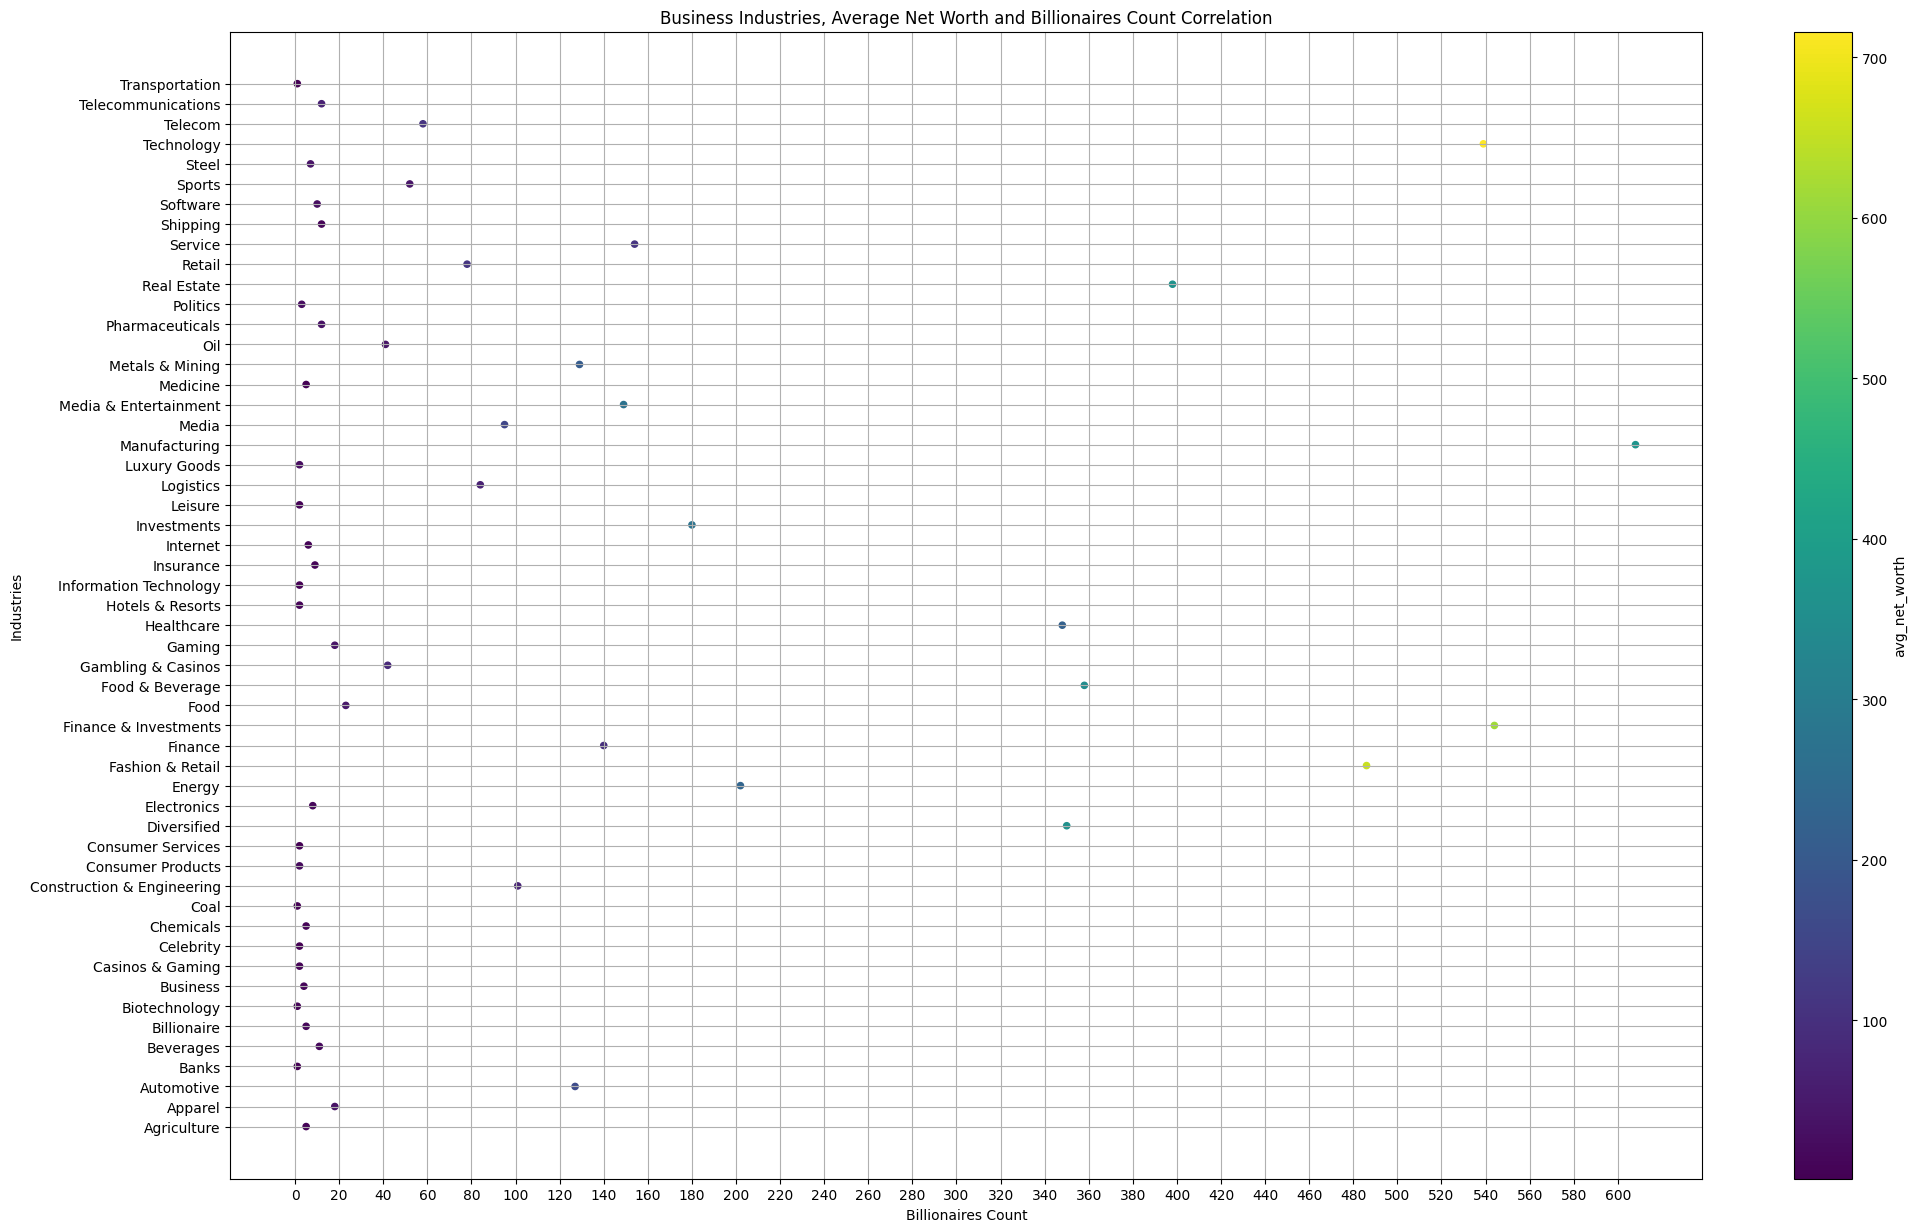

In [19]:
industry_net_worth_sum = df.groupby(['business_industries', 'year'])['net_worth'].sum()

# Calculating the average net worth for each industry over the years
industry_avg_net_worth = industry_net_worth_sum.groupby('business_industries').mean()

# Getting the count of billionaires for each industry
industry_count = df.groupby('business_industries')['full_name'].nunique()

# Extracting industry names and data for plotting
industries = industry_avg_net_worth.index.tolist()
avg_net_worth = industry_avg_net_worth.values.tolist()
billionaires_count = industry_count.values.tolist()

# Creating a DataFrame
data = {
    'industries': industries,
    'avg_net_worth': avg_net_worth,
    'billionaires_count': billionaires_count
}
df_plt = pd.DataFrame(data)

# Plotting scatter plot
df_plt.plot.scatter(x='billionaires_count', y='industries', title='Business Industries, Average Net Worth and Billionaires Count Correlation', c='avg_net_worth', colormap='viridis') 
plt.xlabel('Billionaires Count')
plt.ylabel('Industries') 
plt.subplots_adjust(top=2.5, right=3)
plt.grid(True) 
plt.xticks(np.arange(0, df_plt['billionaires_count'].max(), 20))
plt.show()

### **2.1.11.** 

Context: You want to invest your money in some startups, but you would like to make sure that your investment is in only the safest industries.
#### **Q: What are the safest industries to invest in that grew (or) took the least damage during the global economic crisis in 2008 and Covid?**
*Features: industries, years, net worth*

#### **Answer:**

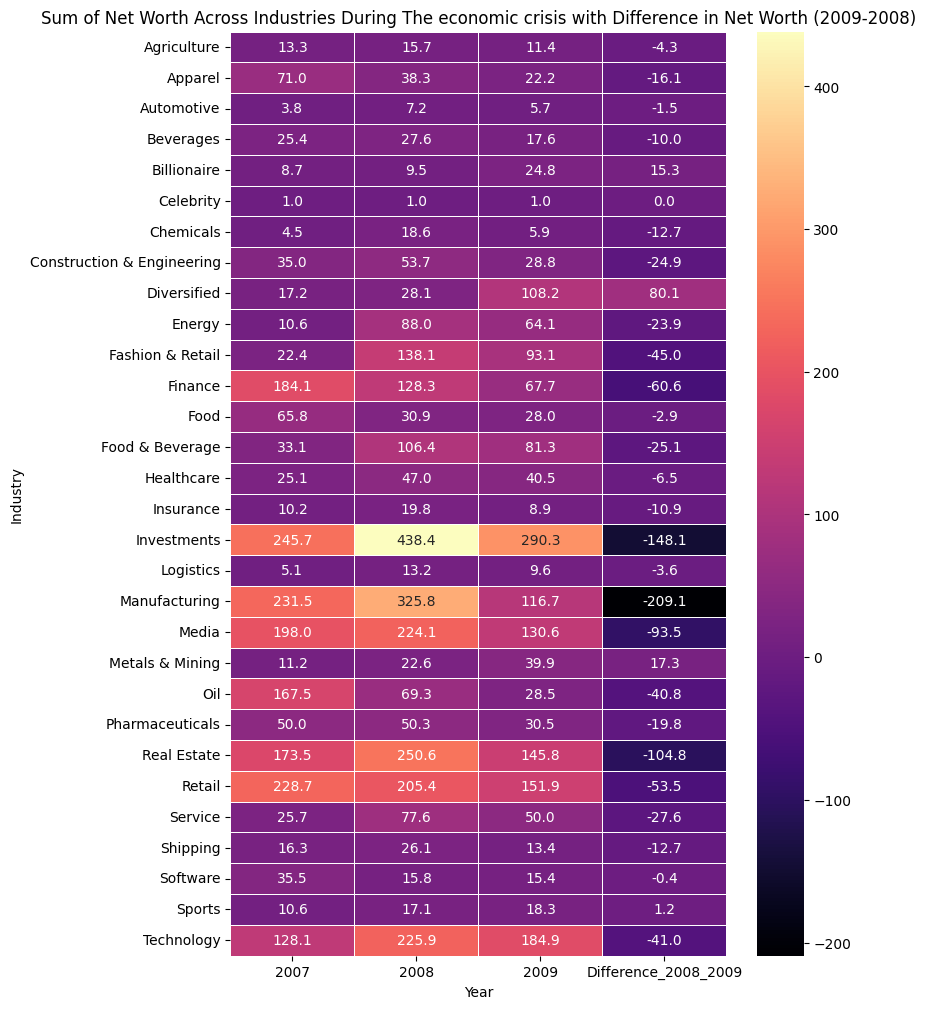

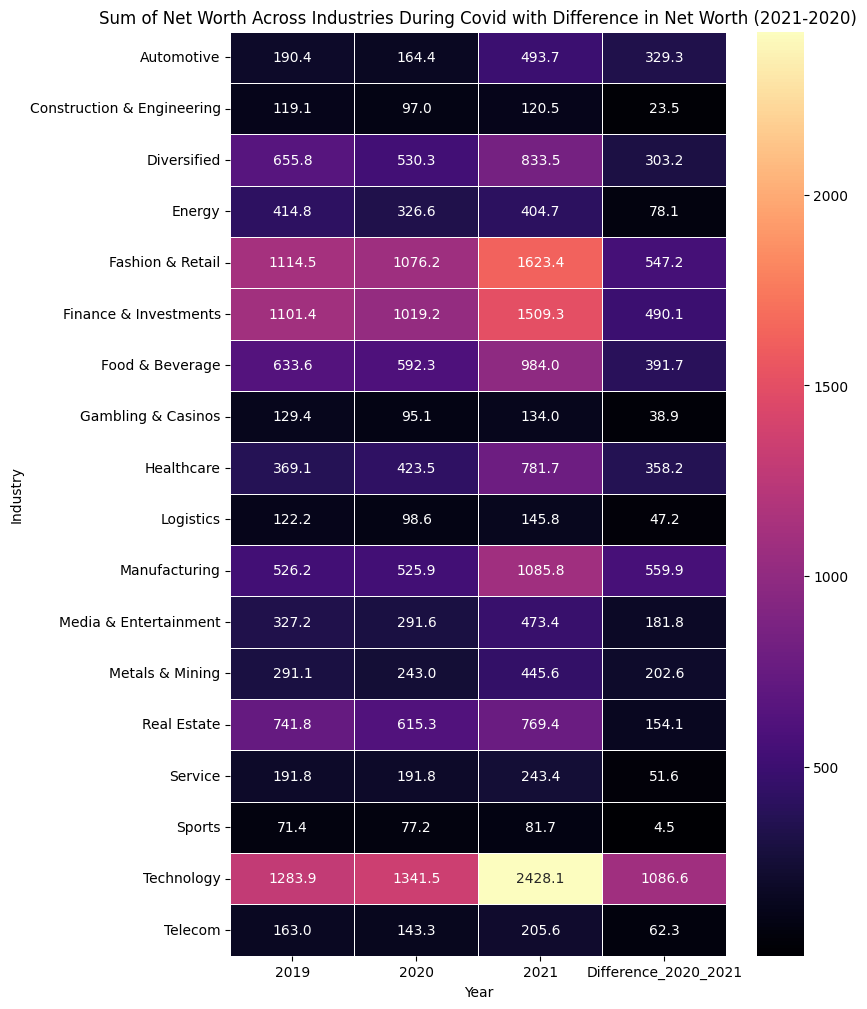

In [20]:
def study_years(year1, year2,year3, text):
    # Filter data for the years 
    filtered_data_year1 = df[df['year'] == year1]['business_industries']
    filtered_data_year2 = df[df['year'] == year2]['business_industries']
    filtered_data_year3 = df[df['year'] == year3]['business_industries']

    common_data = set(filtered_data_year1) & set(filtered_data_year2) & set(filtered_data_year3)

    filtered_common_data = df[df['business_industries'].isin(common_data)]

    filtered_data = filtered_common_data[filtered_common_data['year'].isin([year1, year2, year3])]

    # Group data by year and industry, and sum the net worth
    grouped_data = filtered_data.groupby(['year', 'business_industries'])['net_worth'].sum().reset_index()

    # Pivot the data for easy plotting
    pivot_data = grouped_data.pivot(index='business_industries', columns='year', values='net_worth')

    # Calculate the difference between year2 and year3 net worth for each industry
    pivot_data[f'Difference_{year2}_{year3}'] = pivot_data[year3] - pivot_data[year2]

    # Plotting
    plt.figure(figsize=(8, 12))
    sns.heatmap(pivot_data, cmap='magma', annot=True, fmt=".1f", linewidths=0.5)
    plt.title(f'Sum of Net Worth Across Industries During {text} with Difference in Net Worth ({year3}-{year2})')
    plt.xlabel('Year')
    plt.ylabel('Industry')
    plt.show() 
study_years(2007,2008,2009, "The Economic Crisis")
study_years(2019,2020,2021, "Covid")